In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Setting display options

pd.set_option('display.max_columns', 500)

In [3]:
# Loading the required datasets

# Loading the dataset related to Previous Loan Applications

previous_application = pd.read_csv("previous_application.csv")

In [4]:
# Displaying the loaded dataset's head for quick glance

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# View the shape of the dataset

previous_application.shape

(1670214, 37)

In [6]:
# Let's understand the data types of all the columns and counts

previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [7]:
# Let's view the statistical information from the columns those are already numeric

previous_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective
- We will handle and manage the missing or null values that are present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will keep only those columns that are required to achieve the business objective.
- We will ignore all the other extra informations that are present in the dataframe and are not required.

In [8]:
# Deleting the columns that might affect our analysis just by their meaning'

del_columns = [
    'SK_ID_PREV',
    'SK_ID_CURR',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'NAME_PAYMENT_TYPE',
    'NAME_TYPE_SUITE',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'SELLERPLACE_AREA',
    'NAME_SELLER_INDUSTRY',
    'PRODUCT_COMBINATION'
]

In [9]:
# Dropping the above mentioned columns from the list

previous_application.drop(del_columns,axis = 1,inplace=True)

In [10]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,XAP,Repeater,Mobile,12.0,middle,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XAP,Repeater,XNA,36.0,low_action,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,Y,1,NaN,NaN,NaN,XNA,Approved,-301,XAP,Repeater,XNA,12.0,high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,Y,1,NaN,NaN,NaN,XNA,Approved,-512,XAP,Repeater,XNA,12.0,middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,HC,Repeater,XNA,24.0,high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
previous_application.shape

(1670214, 25)

In [12]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_CONTRACT_TYPE           1670214 non-null  object 
 1   AMT_ANNUITY                  1297979 non-null  float64
 2   AMT_APPLICATION              1670214 non-null  float64
 3   AMT_CREDIT                   1670213 non-null  float64
 4   AMT_DOWN_PAYMENT             774370 non-null   float64
 5   AMT_GOODS_PRICE              1284699 non-null  float64
 6   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 8   RATE_DOWN_PAYMENT            774370 non-null   float64
 9   RATE_INTEREST_PRIMARY        5951 non-null     float64
 10  RATE_INTEREST_PRIVILEGED     5951 non-null     float64
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

## Univariate Analysis
- Analysis to check the null value counts, missing values, incorrect column type
- Distribution of values throughout the columns

In [13]:
# Let's check the null count percentage

previous_application.isnull().sum()/previous_application.shape[0]*100

NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP                0.000000
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON

In [14]:
# We will delete those columns whose missing value percentage is >20%

del_columns = [
    'AMT_ANNUITY',
    'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE',
    'RATE_DOWN_PAYMENT',
    'RATE_INTEREST_PRIMARY',
    'RATE_INTEREST_PRIVILEGED',
    'CNT_PAYMENT',
    'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION',
    'DAYS_LAST_DUE',
    'DAYS_TERMINATION',
    'NFLAG_INSURED_ON_APPROVAL'
]

In [15]:
# Dropping the above mentioned columns from the list

previous_application.drop(del_columns,axis = 1,inplace=True)

In [16]:
# Displaying the head again

previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP
0,Consumer loans,17145.0,17145.0,Y,1,XAP,Approved,-73,XAP,Repeater,Mobile,middle
1,Cash loans,607500.0,679671.0,Y,1,XNA,Approved,-164,XAP,Repeater,XNA,low_action
2,Cash loans,112500.0,136444.5,Y,1,XNA,Approved,-301,XAP,Repeater,XNA,high
3,Cash loans,450000.0,470790.0,Y,1,XNA,Approved,-512,XAP,Repeater,XNA,middle
4,Cash loans,337500.0,404055.0,Y,1,Repairs,Refused,-781,HC,Repeater,XNA,high


In [17]:
# We can see, there are many XAP,XNA values in the columns.
# Let's count the percentage of XAP/XNA values in each column

print("NAME_CASH_LOAN_PURPOSE: " + str(previous_application[(previous_application.NAME_CASH_LOAN_PURPOSE=='XAP') | (previous_application.NAME_CASH_LOAN_PURPOSE == 'XNA')].shape[0]/previous_application.shape[0]*100))
print("CODE_REJECT_REASON: " + str(previous_application[(previous_application.CODE_REJECT_REASON=='XAP') | (previous_application.CODE_REJECT_REASON == 'XNA')].shape[0]/previous_application.shape[0]*100))
print("NAME_GOODS_CATEGORY: " + str(previous_application[(previous_application.NAME_GOODS_CATEGORY=='XAP') | (previous_application.NAME_GOODS_CATEGORY == 'XNA')].shape[0]/previous_application.shape[0]*100))

NAME_CASH_LOAN_PURPOSE: 95.83077378108435
CODE_REJECT_REASON: 81.32712335066046
NAME_GOODS_CATEGORY: 56.92737577340389


In [18]:
# We can observe the precentage of such values is huge
# So we can directly remove those columns.

del_columns = [
    'NAME_CASH_LOAN_PURPOSE',
    'CODE_REJECT_REASON',
    'NAME_GOODS_CATEGORY'
]

# Dropping the above mentioned columns from the list

previous_application.drop(del_columns,axis = 1,inplace=True)

In [19]:
# Displaying the result head

previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,Consumer loans,17145.0,17145.0,Y,1,Approved,-73,Repeater,middle
1,Cash loans,607500.0,679671.0,Y,1,Approved,-164,Repeater,low_action
2,Cash loans,112500.0,136444.5,Y,1,Approved,-301,Repeater,high
3,Cash loans,450000.0,470790.0,Y,1,Approved,-512,Repeater,middle
4,Cash loans,337500.0,404055.0,Y,1,Refused,-781,Repeater,high


In [20]:
# Checking the null purcentage
previous_application.isnull().sum()/previous_application.shape[0]*100

NAME_CONTRACT_TYPE             0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_CLIENT_TYPE               0.00000
NAME_YIELD_GROUP               0.00000
dtype: float64

In [21]:
# Displaying the shape of the data

previous_application.shape

(1670214, 9)

In [22]:
# There are very less percentage of null values in AMT_CREDIT column, let's remove those values from the data
previous_application = previous_application[~previous_application.AMT_CREDIT.isnull()]

# Checking the null purcentage
previous_application.isnull().sum()/previous_application.shape[0]*100

NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_CLIENT_TYPE               0.0
NAME_YIELD_GROUP               0.0
dtype: float64

In [23]:
previous_application.dtypes

NAME_CONTRACT_TYPE              object
AMT_APPLICATION                float64
AMT_CREDIT                     float64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_CLIENT_TYPE                object
NAME_YIELD_GROUP                object
dtype: object

In [24]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,Consumer loans,17145.0,17145.0,Y,1,Approved,-73,Repeater,middle
1,Cash loans,607500.0,679671.0,Y,1,Approved,-164,Repeater,low_action
2,Cash loans,112500.0,136444.5,Y,1,Approved,-301,Repeater,high
3,Cash loans,450000.0,470790.0,Y,1,Approved,-512,Repeater,middle
4,Cash loans,337500.0,404055.0,Y,1,Refused,-781,Repeater,high


## Univariate Analysis for Distribution
- We will analyze how the data is spread throughout the column
- For categorical columns, we will count the number of each category and then visualize it in bar/pie chart.
- For numerical columns, we will analyze the spread of numbers and remove the outliers from the data.

In [25]:
# Let's view the applications that are not the last application per contract
# We can remove such applications from the data as they are not required at all and duplicate entry may be present in the data

previous_application[previous_application.FLAG_LAST_APPL_PER_CONTRACT == 'N'].shape[0]

8475

In [26]:
# Removing the values from data where the application is not the last application of the day

previous_application = previous_application[~(previous_application.FLAG_LAST_APPL_PER_CONTRACT == 'N')]

# Removing the column as it is not even required for further analysis.

previous_application.drop(['FLAG_LAST_APPL_PER_CONTRACT'],inplace=True, axis=1)

In [27]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,Consumer loans,17145.0,17145.0,1,Approved,-73,Repeater,middle
1,Cash loans,607500.0,679671.0,1,Approved,-164,Repeater,low_action
2,Cash loans,112500.0,136444.5,1,Approved,-301,Repeater,high
3,Cash loans,450000.0,470790.0,1,Approved,-512,Repeater,middle
4,Cash loans,337500.0,404055.0,1,Refused,-781,Repeater,high


In [28]:
# Similarly we can check for the NFLAG_LAST_APPL_IN_DAY

previous_application[previous_application.NFLAG_LAST_APPL_IN_DAY == 0].shape[0]

786

In [29]:
# We can remove those rows as they are not required or there might be many duplicates in the 
# Removing the values from data where the application is not the last application of the day

previous_application = previous_application[~(previous_application.NFLAG_LAST_APPL_IN_DAY == 0)]

# Removing the column as it is not even required for further analysis.

previous_application.drop(['NFLAG_LAST_APPL_IN_DAY'],inplace=True, axis=1)

In [30]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,Consumer loans,17145.0,17145.0,Approved,-73,Repeater,middle
1,Cash loans,607500.0,679671.0,Approved,-164,Repeater,low_action
2,Cash loans,112500.0,136444.5,Approved,-301,Repeater,high
3,Cash loans,450000.0,470790.0,Approved,-512,Repeater,middle
4,Cash loans,337500.0,404055.0,Refused,-781,Repeater,high


In [31]:
previous_application.shape

(1660952, 7)

In [32]:
# Let' consider the NAME_CONTRACT_TYPE column.
# Let' view the count for each cateogry in NAME_CONTRACT_TYPE

previous_application.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747147
Consumer loans     728870
Revolving loans    184589
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [33]:
# Remove those XNA values as they can hamper our analysis

previous_application = previous_application[~(previous_application.NAME_CONTRACT_TYPE == 'XNA')]

In [34]:
# Let's view the count for each category in the NAME_CONTRACT_STATUS

previous_application.NAME_CONTRACT_STATUS.value_counts()

Approved        1036043
Canceled         316002
Refused          282138
Unused offer      26423
Name: NAME_CONTRACT_STATUS, dtype: int64

In [35]:
# Let's view the count for each category in the NAME_YIELD_GROUP

previous_application.NAME_YIELD_GROUP.value_counts()

XNA           508281
middle        385170
high          353195
low_normal    321961
low_action     91999
Name: NAME_YIELD_GROUP, dtype: int64

In [36]:
# Let' drop NAME_YIELD_GROUP as there are many XNA values present in the data which may hamper our analysis

previous_application.drop(['NAME_YIELD_GROUP'],inplace=True,axis=1)

In [37]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE
0,Consumer loans,17145.0,17145.0,Approved,-73,Repeater
1,Cash loans,607500.0,679671.0,Approved,-164,Repeater
2,Cash loans,112500.0,136444.5,Approved,-301,Repeater
3,Cash loans,450000.0,470790.0,Approved,-512,Repeater
4,Cash loans,337500.0,404055.0,Refused,-781,Repeater


In [38]:
# Let's view the count for each category in the NAME_CLIENT_TYPE

previous_application.NAME_CLIENT_TYPE.value_counts()

Repeater     1222633
New           301178
Refreshed     134858
XNA             1937
Name: NAME_CLIENT_TYPE, dtype: int64

In [39]:
# Remove those XNA values as they can hamper our analysis

previous_application = previous_application[~(previous_application.NAME_CLIENT_TYPE == 'XNA')]

In [40]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE
0,Consumer loans,17145.0,17145.0,Approved,-73,Repeater
1,Cash loans,607500.0,679671.0,Approved,-164,Repeater
2,Cash loans,112500.0,136444.5,Approved,-301,Repeater
3,Cash loans,450000.0,470790.0,Approved,-512,Repeater
4,Cash loans,337500.0,404055.0,Refused,-781,Repeater


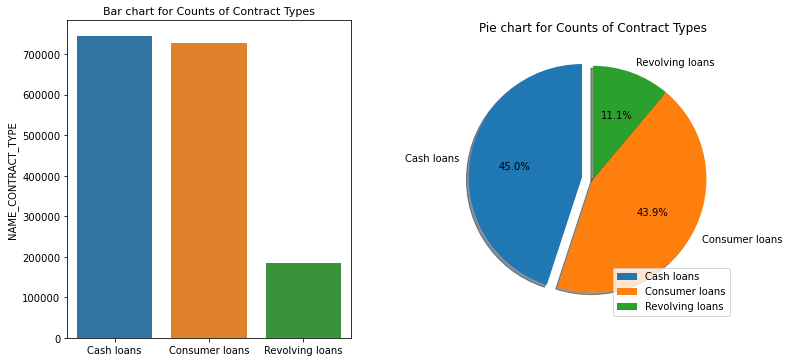

In [41]:
# Let's plot a bar plot for the counts against category in NAME_CONTRACT_TYPE
fig, ax = plt.subplots(1,2,figsize=(10,5))

fig.tight_layout(h_pad=2,w_pad=7)

contract_status = previous_application.NAME_CONTRACT_TYPE.value_counts()
sns.barplot(x = contract_status.index, y=contract_status, ax=ax[0])
ax[0].set_title('Bar chart for Counts of Contract Types', fontsize=11)

explode = (0.1, 0, 0)
contract_status.plot.pie(ax=ax[1], subplots=True, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Pie chart for Counts of Contract Types')
plt.ylabel('')

# for ax in fig.axes:
#     plt.sca(ax)
plt.legend(loc='lower right')
plt.show()

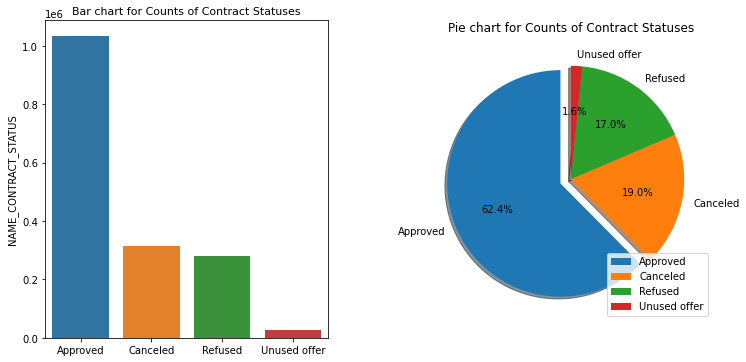

In [42]:
# Let's plot a bar plot for the counts against category in NAME_CONTRACT_STATUS
fig, ax = plt.subplots(1,2,figsize=(10,5))

fig.tight_layout(h_pad=2,w_pad=7)

contract_status = previous_application.NAME_CONTRACT_STATUS.value_counts()
sns.barplot(x = contract_status.index, y=contract_status, ax=ax[0])
ax[0].set_title('Bar chart for Counts of Contract Statuses', fontsize=11)

explode = (0.1, 0, 0, 0)
contract_status.plot.pie(ax=ax[1], subplots=True, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Pie chart for Counts of Contract Statuses')
plt.ylabel('')

# for ax in fig.axes:
#     plt.sca(ax)
plt.legend(loc='lower right')
plt.show()

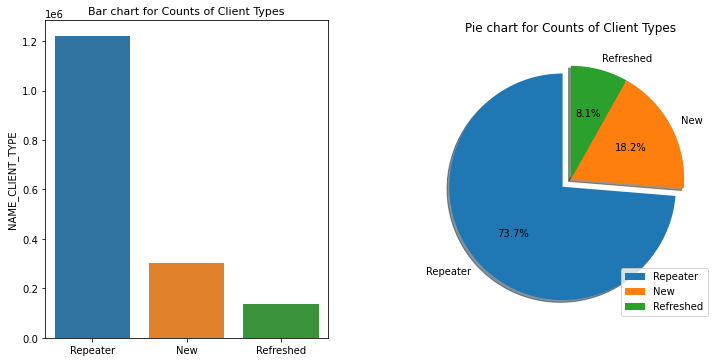

In [43]:
# Let's plot a bar plot for the counts against category in NAME_CLIENT_TYPE
fig, ax = plt.subplots(1,2,figsize=(10,5))

fig.tight_layout(h_pad=2,w_pad=7)

contract_status = previous_application.NAME_CLIENT_TYPE.value_counts()
sns.barplot(x = contract_status.index, y=contract_status, ax=ax[0])
ax[0].set_title('Bar chart for Counts of Client Types', fontsize=11)

explode = (0.1, 0, 0)
contract_status.plot.pie(ax=ax[1], subplots=True, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Pie chart for Counts of Client Types')
plt.ylabel('')

# for ax in fig.axes:
#     plt.sca(ax)
plt.legend(loc='lower right')
plt.show()

In [44]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE
0,Consumer loans,17145.0,17145.0,Approved,-73,Repeater
1,Cash loans,607500.0,679671.0,Approved,-164,Repeater
2,Cash loans,112500.0,136444.5,Approved,-301,Repeater
3,Cash loans,450000.0,470790.0,Approved,-512,Repeater
4,Cash loans,337500.0,404055.0,Refused,-781,Repeater


### Let's analyze the numberical columns
- We will use box plots to analyze the outliers.
- We will then analyze imbalance in the data, deal with them, and then visualize the distributions using other graphs like Histogram, Violin Plot.

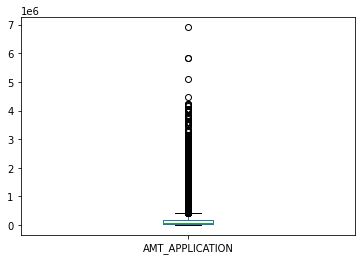

In [45]:
# Let's analyze amount of application using box plot

previous_application.AMT_APPLICATION.plot.box()
plt.show()

In [46]:
# We are seeing more data in between 0 to 1 million, let's check for the 0 or less values

previous_application[previous_application.AMT_APPLICATION <= 0]

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE
6,Cash loans,0.0,0.0,Canceled,-14,Repeater
7,Cash loans,0.0,0.0,Canceled,-21,Repeater
8,Cash loans,0.0,0.0,Canceled,-386,Repeater
9,Cash loans,0.0,0.0,Canceled,-57,Repeater
22,Cash loans,0.0,0.0,Refused,-239,Repeater
...,...,...,...,...,...,...
1670186,Cash loans,0.0,0.0,Canceled,-21,Repeater
1670187,Cash loans,0.0,0.0,Canceled,-134,Repeater
1670190,Cash loans,0.0,0.0,Canceled,-243,Repeater
1670192,Revolving loans,0.0,67500.0,Approved,-540,Refreshed


In [47]:
# There are many such rows, we can remove those entries as Application Amount cannot be zero, 
# and we cannot guess the amount of previous application

previous_application = previous_application[~(previous_application.AMT_APPLICATION<=0)]

In [48]:
# Also, We are clearly see the outliers from the box plot.
# We can delete those entry and consider only those who have the application amount to be lesser than 2 million.
# Removing those upper entries

previous_application = previous_application[~(previous_application.AMT_APPLICATION>2*pow(10,6))]

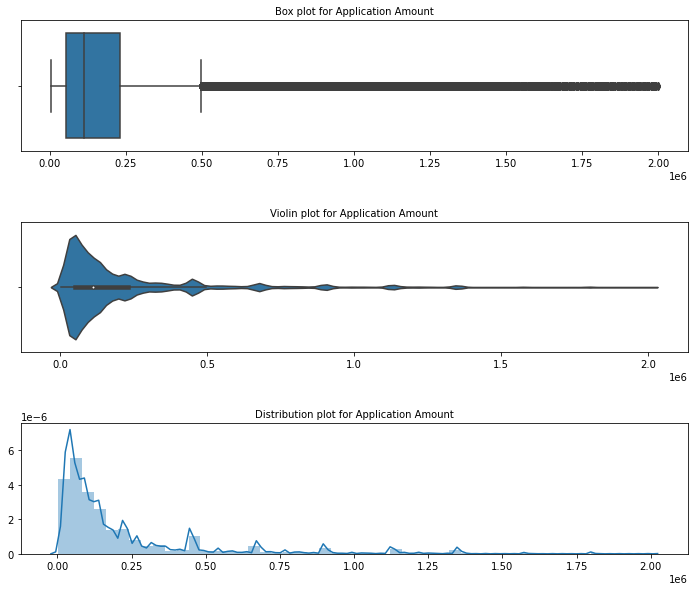

<Figure size 288x432 with 0 Axes>

In [49]:
# Let's plot a  box plot for Amount Application
# Let's plot a violin plot for Amount Application

fig, ax = plt.subplots(3, 1, figsize=(10,8))

fig.tight_layout(h_pad=5,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(previous_application.AMT_APPLICATION,orient='h',ax=ax[0])
ax[0].set_title('Box plot for Application Amount',fontsize=10)

sns.violinplot(previous_application.AMT_APPLICATION,orient='h',ax=ax[1])
ax[1].set_title('Violin plot for Application Amount',fontsize=10)

sns.distplot(previous_application.AMT_APPLICATION,ax=ax[2])
ax[2].set_title('Distribution plot for Application Amount', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
plt.show()

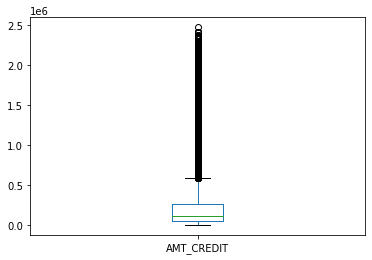

In [50]:
# Let's analyze amount of credit using box plot

previous_application.AMT_CREDIT.plot.box()
plt.show()

In [51]:
# We are clearly see the outliers from the box plot.
# We can delete those entry and consider only those who have the application amount to be lesser than 3 million.
# Removing those upper entries

previous_application = previous_application[~(previous_application.AMT_APPLICATION>2*pow(10,6))]

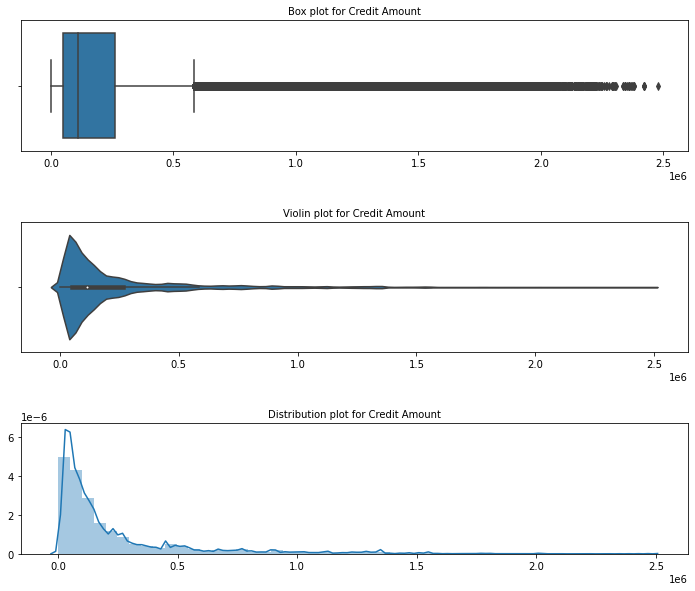

<Figure size 288x432 with 0 Axes>

In [52]:
# Let's plot a  box plot for Amount Credit
# Let's plot a violin plot for Amount Credit

fig, ax = plt.subplots(3, 1, figsize=(10,8))

fig.tight_layout(h_pad=5,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(previous_application.AMT_CREDIT,orient='h',ax=ax[0])
ax[0].set_title('Box plot for Credit Amount',fontsize=10)

sns.violinplot(previous_application.AMT_CREDIT,orient='h',ax=ax[1])
ax[1].set_title('Violin plot for Credit Amount',fontsize=10)

sns.distplot(previous_application.AMT_CREDIT,ax=ax[2])
ax[2].set_title('Distribution plot for Credit Amount', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
plt.show()

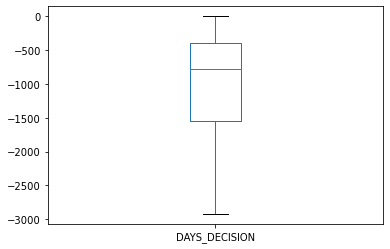

In [53]:
# Let's analyze gap between previous application and current application using box plot

previous_application.DAYS_DECISION.plot.box()
plt.show()

In [54]:
# We can see many negative and high magnitude values in the column.
# As they are w.r.t current application, we can change it to previous application for the ease of understanding
# We can convert those to years and then add those into new column.

previous_application['YEARS_DECISION'] = previous_application.DAYS_DECISION.apply(lambda day: -(day/365.0))

In [55]:
# Let's drop the unnecessary DAYS_DECISION column

previous_application.drop(['DAYS_DECISION'], inplace=True, axis=1)

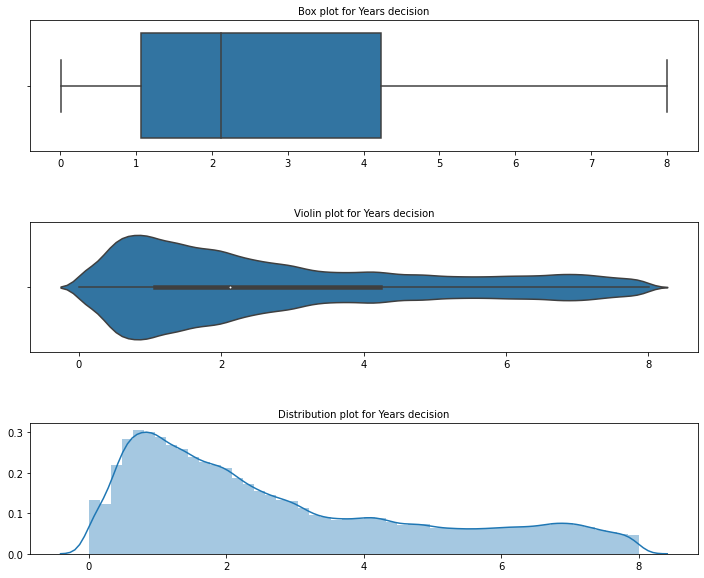

<Figure size 288x432 with 0 Axes>

In [56]:
# Let's plot a  box plot for Years decision (Gap between the applications)
# Let's plot a violin plot for Years decision
# Let's plot a distribution plot for Years decision

fig, ax = plt.subplots(3, 1, figsize=(10,8))

fig.tight_layout(h_pad=5,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(previous_application.YEARS_DECISION,orient='h',ax=ax[0])
ax[0].set_title('Box plot for Years decision',fontsize=10)

sns.violinplot(previous_application.YEARS_DECISION,orient='h',ax=ax[1])
ax[1].set_title('Violin plot for Years decision',fontsize=10)

sns.distplot(previous_application.YEARS_DECISION,ax=ax[2])
ax[2].set_title('Distribution plot for Years decision', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
plt.show()

In [57]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,Consumer loans,17145.0,17145.0,Approved,Repeater,0.200000
1,Cash loans,607500.0,679671.0,Approved,Repeater,0.449315
2,Cash loans,112500.0,136444.5,Approved,Repeater,0.824658
3,Cash loans,450000.0,470790.0,Approved,Repeater,1.402740
4,Cash loans,337500.0,404055.0,Refused,Repeater,2.139726


In [58]:
previous_application.shape

(1268023, 6)

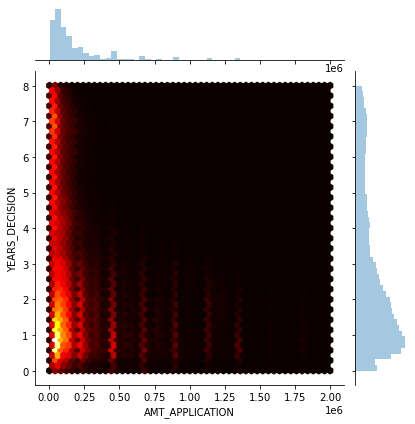

In [59]:
plot = sns.jointplot(x = 'AMT_APPLICATION', 
              y = 'YEARS_DECISION',
              data = previous_application, 
              kind = 'hex', 
              cmap= 'hot', 
              size=6)
plt.show()

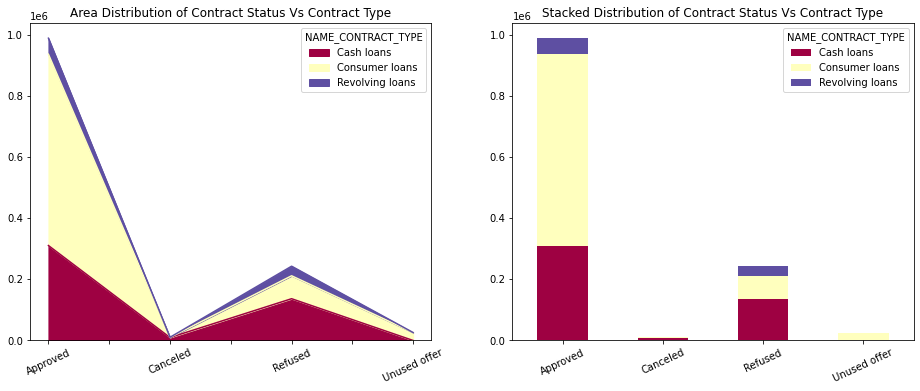

In [60]:
# Let's analyze how the count of contract statuses are spread across contract types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

status_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE'].value_counts()

status_wise_loan_types.unstack().plot(kind='area',stacked=True, colormap= 'Spectral',ax=ax[0])
ax[0].set_title('Area Distribution of Contract Status Vs Contract Type')

status_wise_loan_types.unstack().plot(kind='bar',stacked=True, colormap= 'Spectral',ax=ax[1])
ax[1].set_title('Stacked Distribution of Contract Status Vs Contract Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

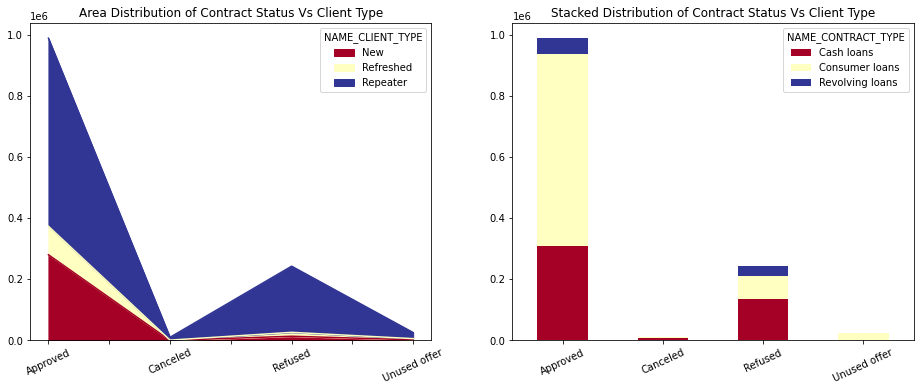

In [61]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

client_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CLIENT_TYPE'].value_counts()

client_wise_loan_types.unstack().plot(kind='area',stacked=True, colormap= 'RdYlBu',ax=ax[0])
ax[0].set_title('Area Distribution of Contract Status Vs Client Type')

status_wise_loan_types.unstack().plot(kind='bar',stacked=True, colormap= 'RdYlBu',ax=ax[1])
ax[1].set_title('Stacked Distribution of Contract Status Vs Client Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

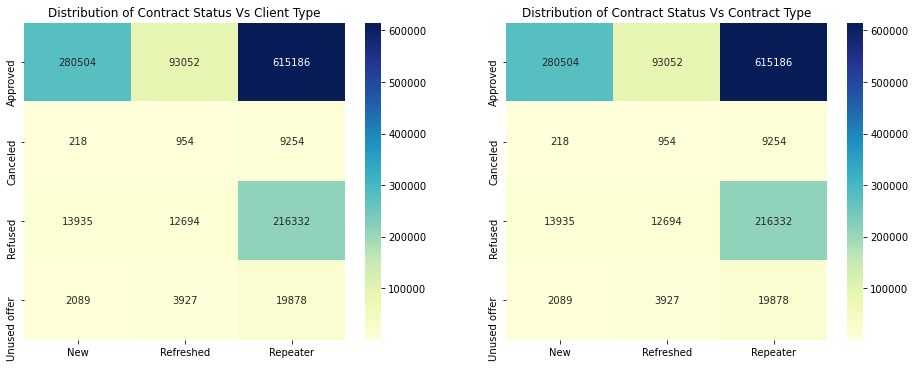

In [62]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

client_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CLIENT_TYPE'].value_counts().unstack()
sns.heatmap(data=client_wise_loan_types, annot=True,ax=ax[0], fmt="d" , cmap='YlGnBu')
ax[0].set_title('Distribution of Contract Status Vs Client Type')

contract_wise_loan_types = previous_application.groupby(['NAME_CONTRACT_STATUS'])['NAME_CONTRACT_TYPE'].value_counts().unstack()
sns.heatmap(data=client_wise_loan_types, annot=True,ax=ax[1], fmt="d", cmap='YlGnBu')
ax[1].set_title('Distribution of Contract Status Vs Contract Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

In [63]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,Consumer loans,17145.0,17145.0,Approved,Repeater,0.200000
1,Cash loans,607500.0,679671.0,Approved,Repeater,0.449315
2,Cash loans,112500.0,136444.5,Approved,Repeater,0.824658
3,Cash loans,450000.0,470790.0,Approved,Repeater,1.402740
4,Cash loans,337500.0,404055.0,Refused,Repeater,2.139726


In [64]:
previous_application.shape

(1268023, 6)

<Figure size 432x432 with 0 Axes>

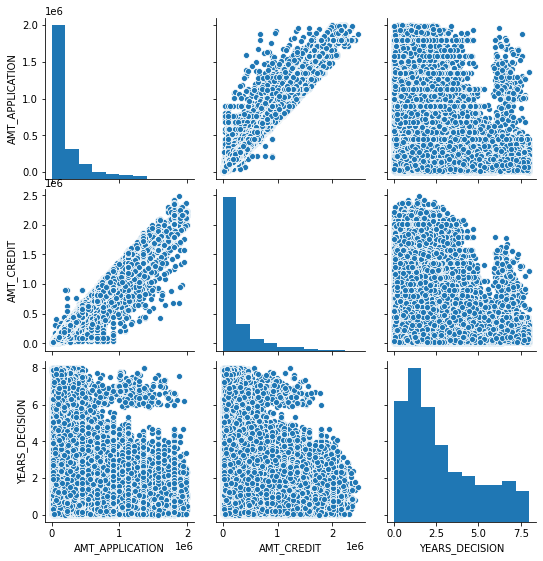

In [65]:
plt.figure(figsize=[6,6])
sns.pairplot(previous_application[['AMT_APPLICATION','AMT_CREDIT','YEARS_DECISION']])
plt.show()

In [66]:
# Let's bucket the total requested amount of previous application into 5 groups viz. '<45K','45k to 85K','85K to 138K','138K to 315K','>315K'

previous_application['AMT_APPLICATION'] = pd.qcut(previous_application.AMT_APPLICATION ,5,['<45K','45k to 85K','85K to 138K','138K to 315K','>315K'])


# Let's bucket the credit amount of previous application into 5 groups viz. <0.1M, 0.1M to 0.6M, 0.6M to 1.1M, 1.1M to 1.6M, >1.6M

previous_application['AMT_CREDIT'] = pd.qcut(previous_application.AMT_CREDIT ,5,['<45K','45k to 85K','85K to 138K','138K to 315K','>315K'])


# Let's bucket the years between previous and current application into 6 groups viz. '<1', '1 to 1.65', '1.65 to 2.73', '2.73 to 4.87', '>4.87'

previous_application['YEARS_DECISION'] = pd.qcut(previous_application.YEARS_DECISION ,5,['<1', '1 to 1.65', '1.65 to 2.73', '2.73 to 4.87', '>4.87'])

In [67]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,Consumer loans,<45K,<45K,Approved,Repeater,<1
1,Cash loans,>315K,>315K,Approved,Repeater,<1
2,Cash loans,85K to 138K,85K to 138K,Approved,Repeater,<1
3,Cash loans,>315K,>315K,Approved,Repeater,1 to 1.65
4,Cash loans,>315K,>315K,Refused,Repeater,1.65 to 2.73


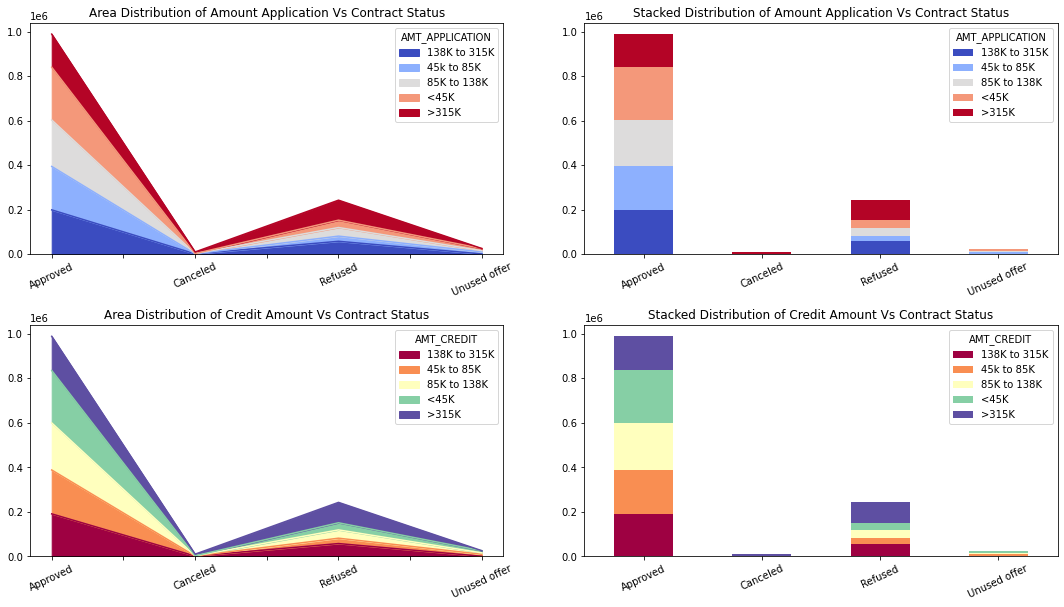

In [68]:
# Let's analyze how the count of contract statuses are spread across contract types.

fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

application_status = previous_application.groupby(['NAME_CONTRACT_STATUS'])['AMT_APPLICATION'].value_counts()

application_status.unstack().plot(kind='area',stacked=True, colormap= 'coolwarm',ax=ax[0][0])
ax[0][0].set_title('Area Distribution of Amount Application Vs Contract Status')

application_status.unstack().plot(kind='bar',stacked=True, colormap= 'coolwarm',ax=ax[0][1])
ax[0][1].set_title('Stacked Distribution of Amount Application Vs Contract Status')


credit_status = previous_application.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT'].value_counts()

credit_status.unstack().plot(kind='area',stacked=True, colormap= 'Spectral',ax=ax[1][0])
ax[1][0].set_title('Area Distribution of Credit Amount Vs Contract Status')

credit_status.unstack().plot(kind='bar',stacked=True, colormap= 'Spectral',ax=ax[1][1])
ax[1][1].set_title('Stacked Distribution of Credit Amount Vs Contract Status')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

In [69]:
# As we can see there is almost similar groups in AMT_CREDIT and AMT_APPLICATION, so we can remove AMT_APPLICATION group from our analysis

previous_application.drop(['AMT_APPLICATION'],inplace=True, axis=1)

In [70]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,Consumer loans,<45K,Approved,Repeater,<1
1,Cash loans,>315K,Approved,Repeater,<1
2,Cash loans,85K to 138K,Approved,Repeater,<1
3,Cash loans,>315K,Approved,Repeater,1 to 1.65
4,Cash loans,>315K,Refused,Repeater,1.65 to 2.73


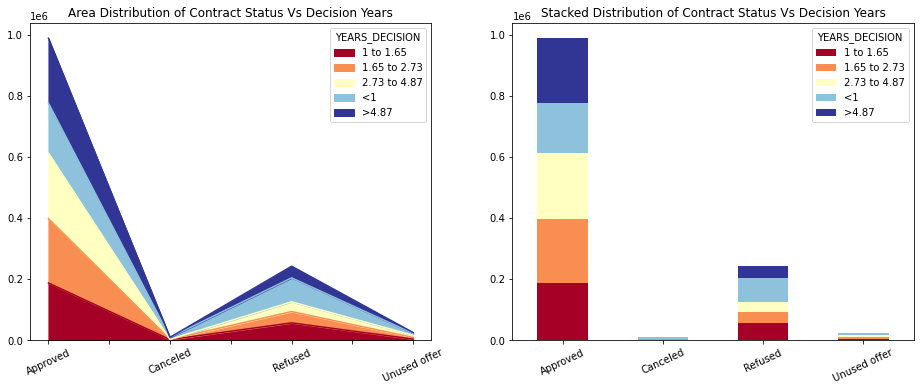

In [71]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(13,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

year_wise_contract = previous_application.groupby(['NAME_CONTRACT_STATUS'])['YEARS_DECISION'].value_counts()

year_wise_contract.unstack().plot(kind='area',stacked=True, colormap= 'RdYlBu',ax=ax[0])
ax[0].set_title('Area Distribution of Contract Status Vs Decision Years')

year_wise_contract.unstack().plot(kind='bar',stacked=True, colormap= 'RdYlBu',ax=ax[1])
ax[1].set_title('Stacked Distribution of Contract Status Vs Decision Years')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

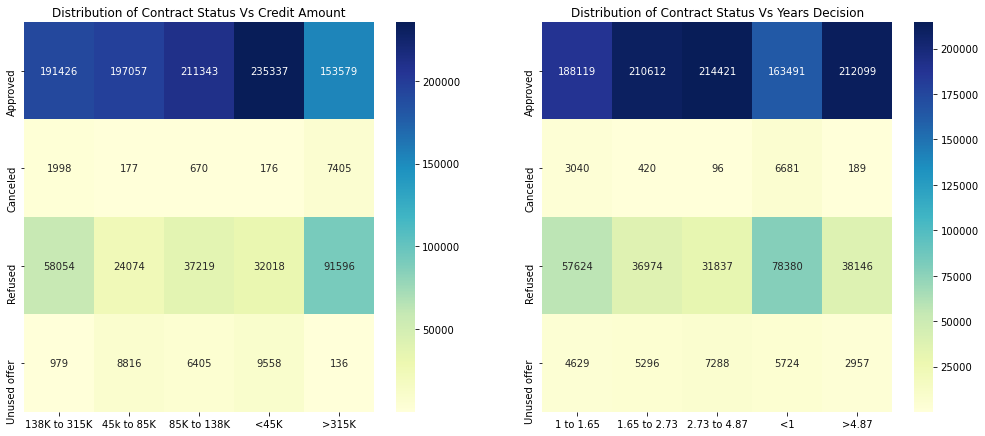

In [72]:
# Let's analyze how the count of contract statuses are spread across client types.

fig, ax = plt.subplots(1, 2, figsize=(14,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=5,w_pad=5)

credit_contract = previous_application.groupby(['NAME_CONTRACT_STATUS'])['AMT_CREDIT'].value_counts().unstack()
sns.heatmap(data=credit_contract, annot=True,ax=ax[0], fmt="d" , cmap='YlGnBu')
ax[0].set_title('Distribution of Contract Status Vs Credit Amount')

years_decision_contract = previous_application.groupby(['NAME_CONTRACT_STATUS'])['YEARS_DECISION'].value_counts().unstack()
sns.heatmap(data=years_decision_contract, annot=True,ax=ax[1], fmt="d", cmap='YlGnBu')
ax[1].set_title('Distribution of Contract Status Vs Years Decision')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

In [73]:
previous_application.head()

,NAME_CONTRACT_TYPE,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,YEARS_DECISION
0,Consumer loans,<45K,Approved,Repeater,<1
1,Cash loans,>315K,Approved,Repeater,<1
2,Cash loans,85K to 138K,Approved,Repeater,<1
3,Cash loans,>315K,Approved,Repeater,1 to 1.65
4,Cash loans,>315K,Refused,Repeater,1.65 to 2.73
